In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Calculator.components.calculator import calculate_net_value

In [7]:
import os
print("Current working directory:", os.getcwd())

df = pd.read_csv(r'..\data_scraping\entry_data\cleaned_combined.csv')
df.head()

Current working directory: c:\Users\t000022w\OneDrive - Trench Group\Documents\VSCode\TariffPilot\accuracy_eval


,invoice_price,brokerage,ev,source_file,frt_intl,oth,dty,hs_code,quantity,unit,general_duty,full_line
0,438138.0,87.1,427866,8069725181-01-trimmed,NaN,NaN,NaN,8504.32.0000,11230.0,KG,2.40,"8504.32.0000 11,230 KG 6.00 NO 427,866 2.40 % ..."
1,108759.0,50.0,100063,8070837181-01-trimmed,8299.0,346.52,1.000,8504.21.0020,6776.0,KG,FREE,"8504.21.0020 6,776 KG 21.00 NO 100,063 FREE FREE"
2,62148.0,50.0,55302,8070838091-01-trimmed,6605.0,191.48,1.000,8504.21.0020,3872.0,KG,FREE,"8504.21.0020 3,872 KG 12.00 NO 55,302 FREE FREE"
3,96457.0,87.1,85554,8073671301-01-trimmed,8360.0,403.11,1.024,8504.32.0000,2842.0,KG,2.40,"8504.32.0000 2,842 KG 1.00 NO 85,554 2.40 % 2,..."
4,68055.0,87.1,57649,8073733321-01-trimmed,NaN,271.59,1.000,8504.21.0020,1360.0,KG,FREE,"8504.21.0020 1,360 KG 3.00 NO 57,649 FREE FREE"


In [8]:
df['general_duty'].replace('FREE', 0, inplace=True)

C:\Users\t000022w\AppData\Local\Temp\ipykernel_4872\2049585160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['general_duty'].replace('FREE', 0, inplace=True)


In [9]:
df.dtypes

invoice_price    float64
brokerage        float64
ev                 int64
source_file       object
frt_intl         float64
oth              float64
dty              float64
hs_code           object
quantity         float64
unit              object
general_duty      object
full_line         object
dtype: object

In [10]:
df['general_duty'] = df['general_duty'].astype(float)

In [11]:
df.head()

,invoice_price,brokerage,ev,source_file,frt_intl,oth,dty,hs_code,quantity,unit,general_duty,full_line
0,438138.0,87.1,427866,8069725181-01-trimmed,NaN,NaN,NaN,8504.32.0000,11230.0,KG,2.4,"8504.32.0000 11,230 KG 6.00 NO 427,866 2.40 % ..."
1,108759.0,50.0,100063,8070837181-01-trimmed,8299.0,346.52,1.000,8504.21.0020,6776.0,KG,0.0,"8504.21.0020 6,776 KG 21.00 NO 100,063 FREE FREE"
2,62148.0,50.0,55302,8070838091-01-trimmed,6605.0,191.48,1.000,8504.21.0020,3872.0,KG,0.0,"8504.21.0020 3,872 KG 12.00 NO 55,302 FREE FREE"
3,96457.0,87.1,85554,8073671301-01-trimmed,8360.0,403.11,1.024,8504.32.0000,2842.0,KG,2.4,"8504.32.0000 2,842 KG 1.00 NO 85,554 2.40 % 2,..."
4,68055.0,87.1,57649,8073733321-01-trimmed,NaN,271.59,1.000,8504.21.0020,1360.0,KG,0.0,"8504.21.0020 1,360 KG 3.00 NO 57,649 FREE FREE"


In [12]:
# Step 1: Clean and convert all numeric columns
numeric_columns = ['invoice_price', 'brokerage', 'frt_intl', 'general_duty']

for col in numeric_columns:
    # Remove common non-numeric characters
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].str.replace('%', '')
    df[col] = df[col].replace('FREE', '0')
    
    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Step 2: Apply the calculation function
df['calculated_ev'] = df.apply(lambda row: calculate_net_value(
    invoice_value=row['invoice_price'],
    brokerage=row['brokerage'],
    freight=row['frt_intl'],
    duty_percent=row['general_duty'],
    mpf_percent=0.3464,
    hmf_percent=0.125,
    tariff_percent=0
)['net_value'], axis=1)

2025-06-17 11:37:43.706 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 11:37:43.706 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-06-17 11:37:43.706 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 11:37:43.706 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 11:37:43.710 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 11:37:43.711 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

In [13]:
df.head()

,invoice_price,brokerage,ev,source_file,frt_intl,oth,dty,hs_code,quantity,unit,general_duty,full_line,calculated_ev
0,438138.0,87.1,427866,8069725181-01-trimmed,0.0,NaN,NaN,8504.32.0000,11230.0,KG,2.4,"8504.32.0000 11,230 KG 6.00 NO 427,866 2.40 % ...",425823.80
1,108759.0,50.0,100063,8070837181-01-trimmed,8299.0,346.52,1.000,8504.21.0020,6776.0,KG,0.0,"8504.21.0020 6,776 KG 21.00 NO 100,063 FREE FREE",99938.89
2,62148.0,50.0,55302,8070838091-01-trimmed,6605.0,191.48,1.000,8504.21.0020,3872.0,KG,0.0,"8504.21.0020 3,872 KG 12.00 NO 55,302 FREE FREE",55232.63
3,96457.0,87.1,85554,8073671301-01-trimmed,8360.0,403.11,1.024,8504.32.0000,2842.0,KG,2.4,"8504.32.0000 2,842 KG 1.00 NO 85,554 2.40 % 2,...",85553.32
4,68055.0,87.1,57649,8073733321-01-trimmed,0.0,271.59,1.000,8504.21.0020,1360.0,KG,0.0,"8504.21.0020 1,360 KG 3.00 NO 57,649 FREE FREE",67649.00


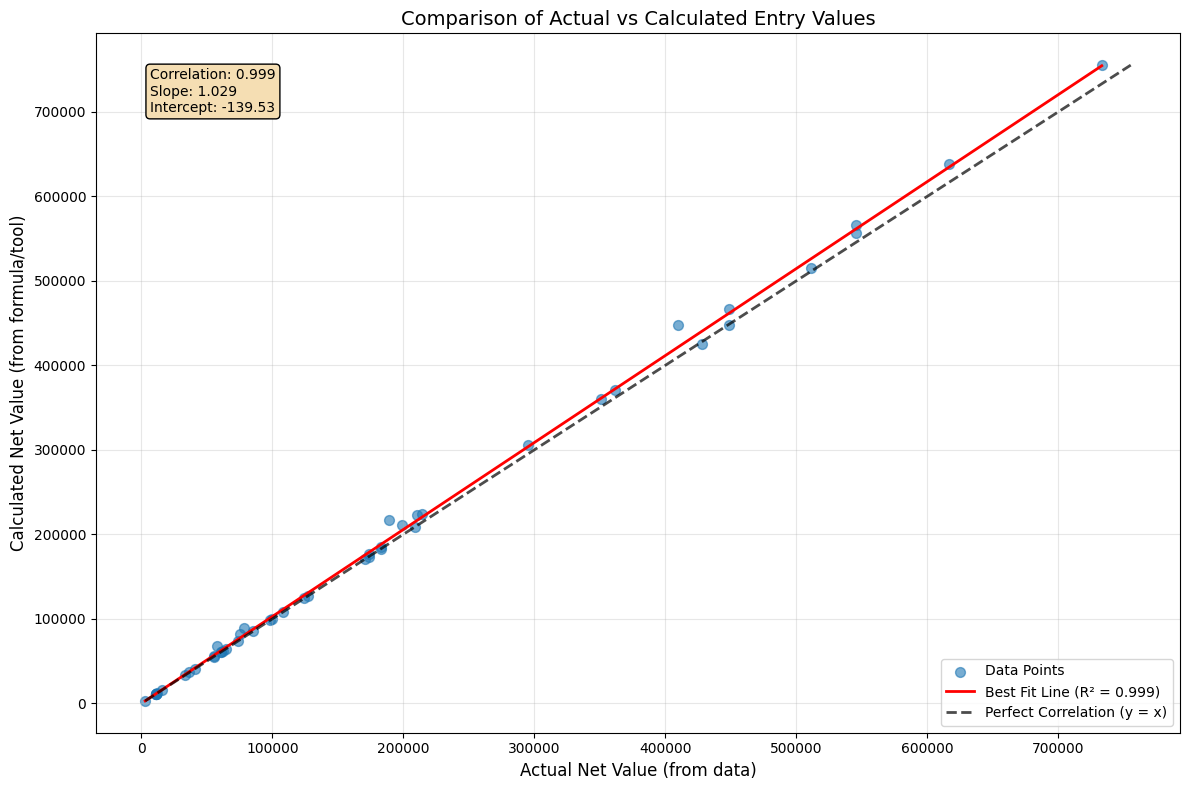

Number of data points: 49
Correlation coefficient: 0.9993
R-squared: 0.9987
Mean Absolute Error: 5434.72
Root Mean Square Error: 10251.18


In [14]:
# ensure the 'ev' column is numeric
df['ev'] = pd.to_numeric(df['ev'], errors='coerce').fillna(0)

# Remove rows where both values are 0 or NaN for better visualization
plot_df = df[(df['ev'] > 0) & (df['calculated_ev'] > 0)].copy()

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(plot_df['ev'], plot_df['calculated_ev'], alpha=0.6, s=50, label='Data Points')

# Calculate best fit lines
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regression
X = plot_df['ev'].values.reshape(-1, 1)
y = plot_df['calculated_ev'].values

# Fit linear regression
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Create smooth line for plotting
x_range = np.linspace(plot_df['ev'].min(), plot_df['ev'].max(), 100)
y_smooth = reg.predict(x_range.reshape(-1, 1))

# Plot best fit line
plt.plot(x_range, y_smooth, color='red', linewidth=2, label=f'Best Fit Line (R² = {reg.score(X, y):.3f})')

# Plot perfect correlation line (y = x)
min_val = min(plot_df['ev'].min(), plot_df['calculated_ev'].min())
max_val = max(plot_df['ev'].max(), plot_df['calculated_ev'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, alpha=0.7, label='Perfect Correlation (y = x)')

# Customize the plot
plt.xlabel('Actual Net Value (from data)', fontsize=12)
plt.ylabel('Calculated Net Value (from formula/tool)', fontsize=12)
plt.title('Comparison of Actual vs Calculated Entry Values', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Add statistics to the plot
correlation = plot_df['ev'].corr(plot_df['calculated_ev'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}\nSlope: {reg.coef_[0]:.3f}\nIntercept: {reg.intercept_:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

plt.tight_layout()
plt.show()

# Print additional statistics
print(f"Number of data points: {len(plot_df)}")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"R-squared: {reg.score(X, y):.4f}")
print(f"Mean Absolute Error: {np.mean(np.abs(plot_df['ev'] - plot_df['calculated_ev'])):.2f}")
print(f"Root Mean Square Error: {np.sqrt(np.mean((plot_df['ev'] - plot_df['calculated_ev'])**2)):.2f}")

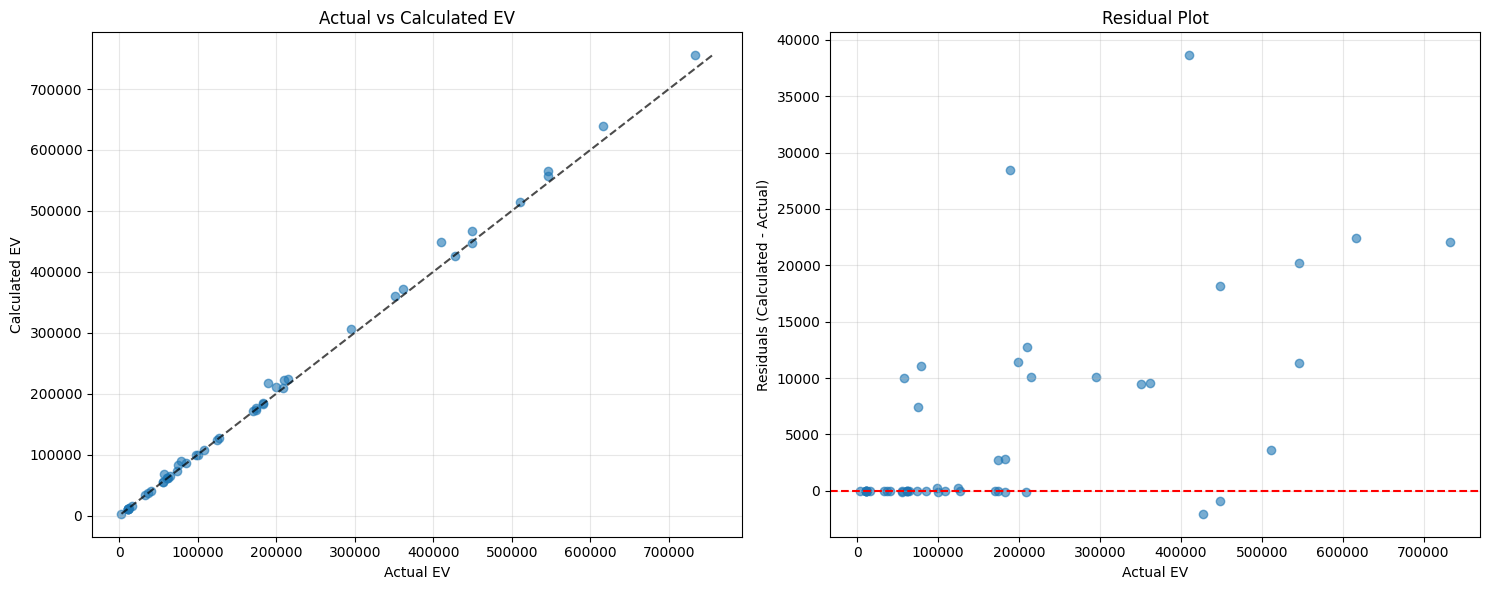

In [15]:
# Create residual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Main scatter plot
ax1.scatter(plot_df['ev'], plot_df['calculated_ev'], alpha=0.6)
ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7)
ax1.set_xlabel('Actual EV')
ax1.set_ylabel('Calculated EV')
ax1.set_title('Actual vs Calculated EV')
ax1.grid(True, alpha=0.3)

# Residual plot
residuals = plot_df['calculated_ev'] - plot_df['ev']
ax2.scatter(plot_df['ev'], residuals, alpha=0.6)
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('Actual EV')
ax2.set_ylabel('Residuals (Calculated - Actual)')
ax2.set_title('Residual Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
# Perform linear regression on the residuals
res_X = plot_df['ev'].values.reshape(-1, 1)
res_y = residuals.values

res_reg = LinearRegression()
res_reg.fit(res_X, res_y)
res_y_pred = res_reg.predict(res_X)

# Plot the regression line on the residual plot
ax2.plot(plot_df['ev'], res_y_pred, color='orange', linewidth=2, label=f'Residual Fit (slope={res_reg.coef_[0]:.4f})')
ax2.legend()

# Print regression statistics for residuals
print(f"Residual regression slope: {res_reg.coef_[0]:.6f}")
print(f"Residual regression intercept: {res_reg.intercept_:.2f}")
print(f"Residual regression R-squared: {res_reg.score(res_X, res_y):.6f}")

Residual regression slope: 0.029316
Residual regression intercept: -139.53
Residual regression R-squared: 0.379763
